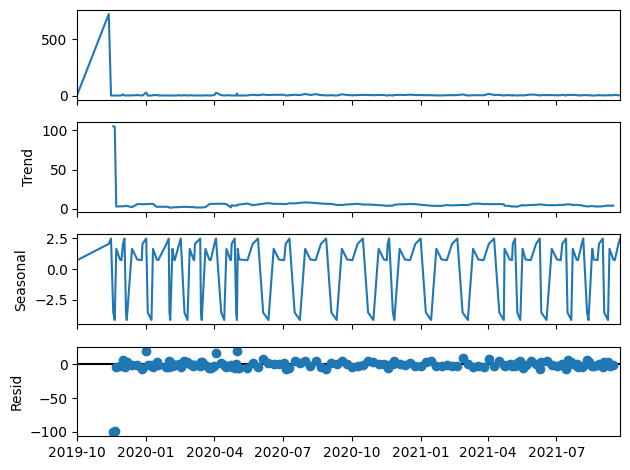

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


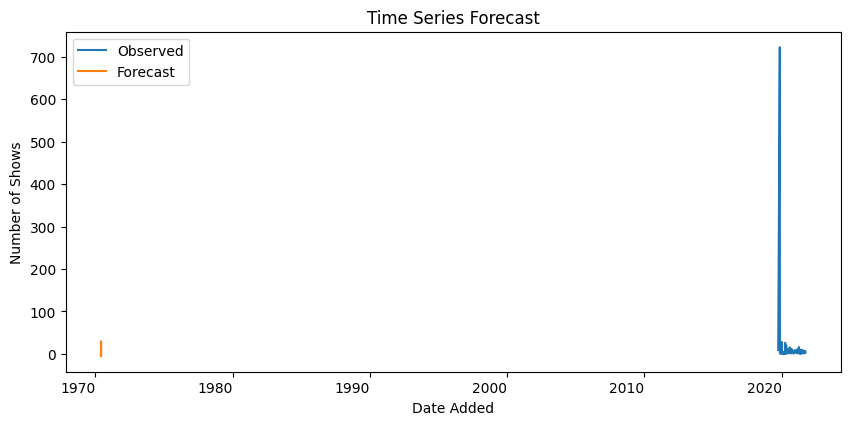

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Step 1: Load Data (Replace 'your_data.csv' with the actual file path)
df = pd.read_csv('/content/disney_plus_titles.csv')

# Step 2: Convert 'date_added' to DateTime
df['date_added'] = pd.to_datetime(df['date_added'])

# Step 3: Aggregate Data by Date
# Count the number of shows added on each date
time_series = df.groupby('date_added').size()

# Step 4: Decompose the Time Series to Analyze Trends and Seasonality
decomposition = seasonal_decompose(time_series, model='additive', period=7)  # Assuming weekly seasonality
decomposition.plot()
plt.show()

# Step 5: Apply Exponential Smoothing for Forecasting
model = ExponentialSmoothing(time_series, trend='add', seasonal='add', seasonal_periods=7)
fit_model = model.fit()

# Step 6: Forecast the next 7 periods (adjust as needed)
forecast = fit_model.forecast(7)

# Step 7: Plot the original time series and the forecast
plt.figure(figsize=(10, 5))
time_series.plot(label='Observed', legend=True)
forecast.plot(label='Forecast', legend=True)
plt.xlabel('Date Added')
plt.ylabel('Number of Shows')
plt.title('Time Series Forecast')
plt.show()


Sentiment Analysis Statistics:
count    1368.000000
mean        0.098366
std         0.296196
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.250000
max         1.000000
Name: sentiment, dtype: float64


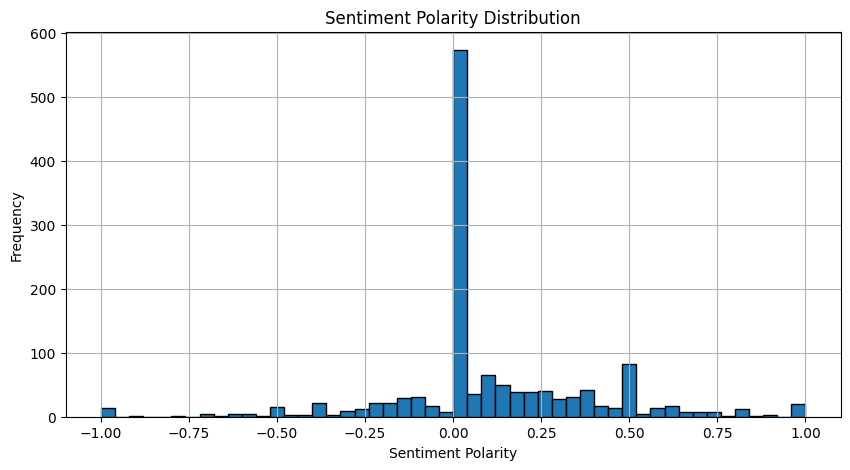

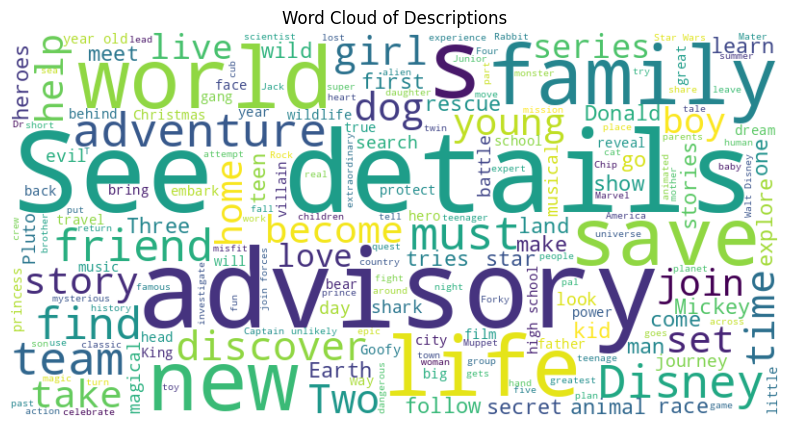

In [ ]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Load Data (Replace 'your_data.csv' with the actual file path)
df = pd.read_csv('/content/disney_plus_titles.csv')

# Step 2: Perform Sentiment Analysis on the 'description' column
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['sentiment'] = df['description'].apply(analyze_sentiment)

# Step 3: Display basic statistics of the sentiment analysis
print("Sentiment Analysis Statistics:")
print(df['sentiment'].describe())

# Step 4: Visualize the Sentiment Distribution
plt.figure(figsize=(10, 5))
df['sentiment'].hist(bins=50, edgecolor='black')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Step 5: Generate Word Cloud for the 'description' column
text = " ".join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


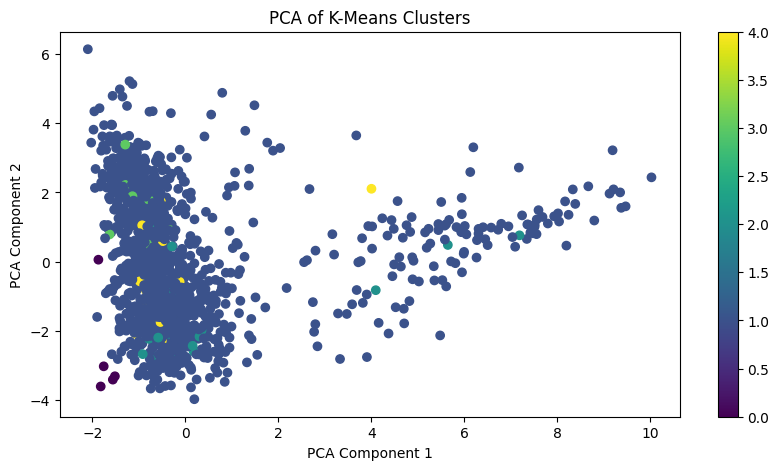

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       302
           1       1.00      1.00      1.00       109

    accuracy                           1.00       411
   macro avg       1.00      1.00      1.00       411
weighted avg       1.00      1.00      1.00       411

Confusion Matrix:
[[302   0]
 [  0 109]]


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load Data (Replace 'your_data.csv' with the actual file path)
df = pd.read_csv('/content/disney_plus_titles.csv')

# Step 2: Preprocessing

# Convert categorical features to numeric using Label Encoding
label_encoders = {}
for column in ['type', 'country', 'rating', 'listed_in']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column].astype(str))
    label_encoders[column] = le

# Convert 'duration' to numeric (assuming format like '90 min', '1 Season')
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

# Convert 'description' to numerical data using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_matrix = tfidf.fit_transform(df['description'].fillna(''))

# Combine TF-IDF features with other features
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
df_combined = pd.concat([df[['type', 'release_year', 'rating', 'duration']], df_tfidf], axis=1)

# Step 3: Clustering (K-Means)

# Standardize the data for better clustering performance
scaler = StandardScaler()
df_combined_scaled = scaler.fit_transform(df_combined)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Change n_clusters based on your need
df['cluster'] = kmeans.fit_predict(df_combined_scaled)

# Visualize the clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_combined_scaled)
plt.figure(figsize=(10, 5))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of K-Means Clusters')
plt.colorbar()
plt.show()

# Step 4: Classification (Random Forest)

# Prepare features and labels for classification
X = df_combined
y = df['type']  # Assuming 'type' is the label we want to predict

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classification performance
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
